## Интерполяция радиальными базисными функциями (1D)

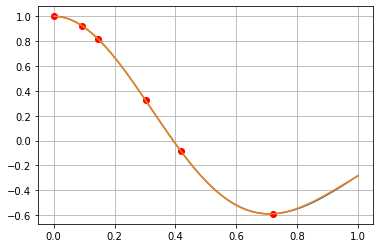

Text(0.5, 1.0, 'Ошибка')

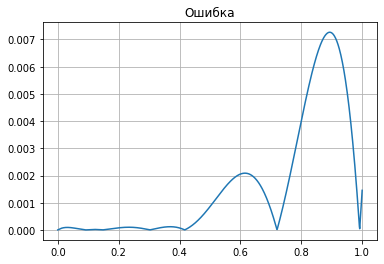

In [3]:
from scipy.interpolate import Rbf
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

f = lambda x: np.cos(4 *x)*np.exp(-np.sin(x**2))

xx = np.linspace(0, 1, 1000)
plt.plot(xx, f(xx))
plt.grid(True)

n = 6
np.random.seed(1)
xi = np.random.rand(n)
xi = np.sort(xi)
plt.plot(xi, f(xi), 'ro')

rbfi = Rbf(xi, f(xi), function = 'gaussian', epsilon = 5e-1)

f_rbf = rbfi(xx)

plt.plot(xx, f_rbf)
plt.show()
plt.plot(xx, np.abs(f_rbf - f(xx)))
plt.grid(True)
plt.title('Ошибка')

## Интерполяция радиальными базисными функциями (2D)

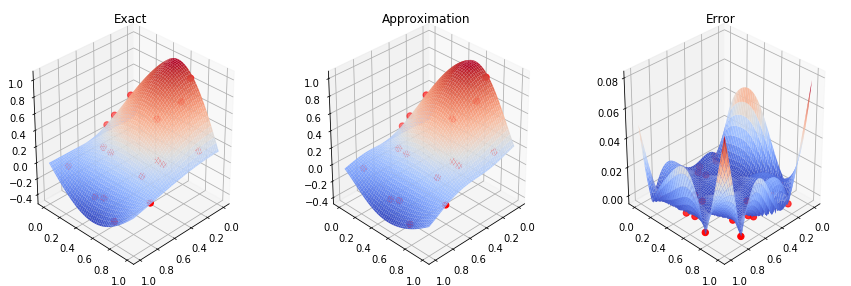

In [4]:
from scipy.interpolate import Rbf
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

f = lambda x, y: np.cos(2 *x) * np.sin(3*y)

xx = yy = np.linspace(0, 1, 100)

X, Y = np.meshgrid(xx, yy)

F = f(X,Y)

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(131, projection='3d')
ax.view_init(30, 45)
ax.plot_surface(X,Y,F, cmap = cm.coolwarm)
ax.set_title('Exact')


xi, yi = np.random.rand(2, 20)
fi = f(xi, yi)
rbfi = Rbf(xi, yi, fi, function = 'gaussian', epsilon = 5e-1)  # radial basis function interpolator instance
di = rbfi(X, Y)   # interpolated values
#
ax.scatter(xi, yi, fi,marker = 'o', s = 40, c = 'r')

ax = fig.add_subplot(132, projection='3d')
ax.view_init(30, 45)
ax.plot_surface(X,Y,di, cmap = cm.coolwarm)
ax.scatter(xi, yi, fi,marker = 'o', s = 40, c = 'r')
ax.set_title('Approximation')

ax = fig.add_subplot(133, projection='3d')
ax.view_init(30, 45)
ax.plot_surface(X,Y, np.abs(di - F), cmap = cm.coolwarm)
ax.scatter(xi, yi, fi * 0.,marker = 'o', s = 40, c = 'r')
ax.set_title('Error')

plt.show()

## Регрессия на основе гауссовских процессов (кригинг)

In [5]:
# Установите этот пакет
# !pip install GPy

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import GPy

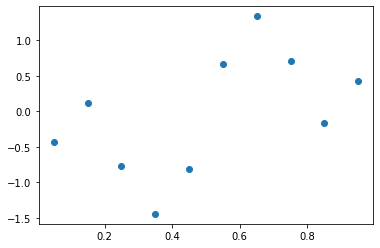

In [7]:
N = 10
X = np.linspace(0.05, 0.95, N).reshape(-1, 1)
Y = -np.cos(np.pi * X) + np.sin(4 * np.pi * X) + \
    np.random.normal(loc=0.0, scale=0.1, size=(N, 1))
# plt.figure(figsize=(5, 3))
plt.plot(X, Y, 'o')

#### Задаём ковариационную функцию

In [8]:
input_dim = 1
variance = 1
lengthscale = 0.02
kernel = GPy.kern.RBF(input_dim, variance=variance,
                      lengthscale=lengthscale)


### Построим различные реализации гауссовского процесса

K.shape =  (100, 100)


Text(0.5, 1.0, 'Realizations of a Gaussian process')

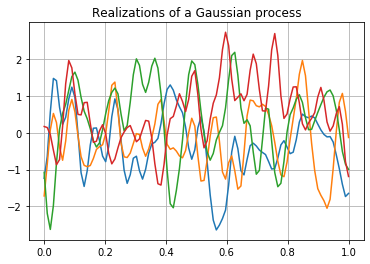

In [9]:
X_fine = np.linspace(0, 1, 100).reshape(-1, 1)
K = kernel.K(X_fine) # covariance matrix
print('K.shape = ', K.shape)

for i in range(4):
    Y_fine = np.random.multivariate_normal(np.zeros_like(X_fine[:, 0]), K)
    plt.plot(X_fine[:, 0], Y_fine)

plt.grid(True)
plt.title('Realizations of a Gaussian process')

### Сама регрессия
По сути - это интерполяция радиальными базисными функциями. Отличие в том, что предположение о вероятностной природе позволяет получить количественную оценку неопределенности значения в каждой точке.


Name : GP regression
Objective : 14.24188369037097
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |   10.0  |      +ve      |        
  rbf.lengthscale          |    0.2  |      +ve      |        
  Gaussian_noise.variance  |    0.0  |   +ve fixed   |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x276626c21c8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x27666882648>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x27666890f08>]}

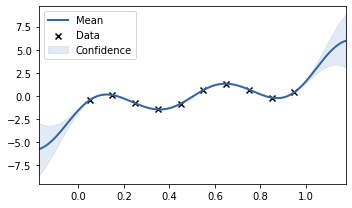

In [10]:
input_dim = 1
variance = 10
lengthscale = 0.2
kernel = GPy.kern.RBF(input_dim, variance=variance,
                      lengthscale=lengthscale)

model = GPy.models.GPRegression(X, Y, kernel)
model.Gaussian_noise.variance.fix(0.0)
print(model)
model.plot(figsize=(5, 3))

#### Plots

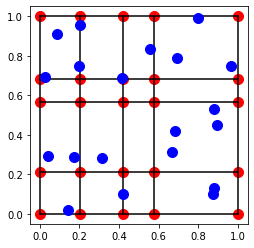

In [11]:
n = 5
np.random.seed(1)
x1 = np.random.rand(n)
x2 = np.random.rand(n)
X1, X2 = np.meshgrid(x1, x2)

max1 = np.max(x1)
min1 = np.min(x1)

max2 = np.max(x2)
min2 = np.min(x2)
x1 = (x1 - min1)/(max1 - min1)
x2 = (x2 - min2)/(max2 - min2)

xs = np.random.rand(2,4*n)

for i in range(n):
    for j in range(n):
        plt.plot(x1[i], x2[j], 'ro', ms = 10)
for i in range(n):
    plt.plot((x1[i], x1[i]), (0, 1), 'k-')
for i in range(n):
    plt.plot((0, 1), (x2[i], x2[i]), 'k-')

ax = plt.gca()
plt.plot(xs[0], xs[1], 'bo', ms = 10)

ax.set_aspect('equal')
# plt.savefig('2d_grid_scatter.png', dpi = 600)